In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9dd122905e25e3d460dc17c4cac66a8


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | nanortalik
Processing Record 3 of Set 13 | saint-philippe
Processing Record 4 of Set 13 | kodiak
Processing Record 5 of Set 13 | rio grande
Processing Record 6 of Set 13 | biak
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | umm kaddadah
Processing Record 9 of Set 13 | tibana
Processing Record 10 of Set 13 | vaini
Processing Record 11 of Set 13 | westport
Processing Record 12 of Set 13 | kapaa
Processing Record 13 of Set 13 | saskylakh
Processing Record 14 of Set 13 | plettenberg bay
Processing Record 15 of Set 13 | albany
Processing Record 16 of Set 13 | saint george
Processing Record 17 of Set 13 | paamiut
Processing Record 18 of Set 13 | kenora
Processing Record 19 of Set 13 | saint-augustin
Processing Record 20 of Set 13 | nemuro
Processing Record 21 of Set 13 | chandbali
Processing Record 22 of Set 13 | cape town
Processing Record 23 of Set 13 | oranjemund
Processing Record 24 of Set 

Processing Record 36 of Set 16 | kaitangata
Processing Record 37 of Set 16 | pokhara
Processing Record 38 of Set 16 | fallon
Processing Record 39 of Set 16 | owando
Processing Record 40 of Set 16 | kirakira
Processing Record 41 of Set 16 | itarema
Processing Record 42 of Set 16 | gazanjyk
Processing Record 43 of Set 16 | zheleznodorozhnyy
Processing Record 44 of Set 16 | arandelovac
City not found. Skipping...
Processing Record 45 of Set 16 | butaritari
Processing Record 46 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 16 | chatellerault
Processing Record 48 of Set 16 | tasiilaq
Processing Record 49 of Set 16 | vardo
Processing Record 50 of Set 16 | hirna
Processing Record 1 of Set 17 | alofi
Processing Record 2 of Set 17 | kaka
Processing Record 3 of Set 17 | viedma
Processing Record 4 of Set 17 | livingston
Processing Record 5 of Set 17 | itupiranga
Processing Record 6 of Set 17 | agadez
Processing Record 7 of Set 17 | tezu
Processing Record 8 of S

Processing Record 22 of Set 20 | meyungs
City not found. Skipping...
Processing Record 23 of Set 20 | muros
Processing Record 24 of Set 20 | dingle
Processing Record 25 of Set 20 | waddan
Processing Record 26 of Set 20 | sabha
Processing Record 27 of Set 20 | yermakovskoye
Processing Record 28 of Set 20 | korla
Processing Record 29 of Set 20 | bismarck
Processing Record 30 of Set 20 | shelton
Processing Record 31 of Set 20 | pacifica
Processing Record 32 of Set 20 | ancud
Processing Record 33 of Set 20 | mutsamudu
City not found. Skipping...
Processing Record 34 of Set 20 | san cristobal
Processing Record 35 of Set 20 | puro
Processing Record 36 of Set 20 | cidreira
Processing Record 37 of Set 20 | port macquarie
Processing Record 38 of Set 20 | moyale
Processing Record 39 of Set 20 | bambous virieux
Processing Record 40 of Set 20 | hailar
Processing Record 41 of Set 20 | hami
Processing Record 42 of Set 20 | ouango
Processing Record 43 of Set 20 | dwarka
Processing Record 44 of Set 20

Processing Record 4 of Set 24 | oistins
Processing Record 5 of Set 24 | tshikapa
Processing Record 6 of Set 24 | panyutyne
Processing Record 7 of Set 24 | karratha
Processing Record 8 of Set 24 | west des moines
Processing Record 9 of Set 24 | sorland
Processing Record 10 of Set 24 | hatillo
Processing Record 11 of Set 24 | leningradskiy
Processing Record 12 of Set 24 | beira
Processing Record 13 of Set 24 | eldikan
City not found. Skipping...
Processing Record 14 of Set 24 | marsh harbour
Processing Record 15 of Set 24 | marijampole
Processing Record 16 of Set 24 | fasa
Processing Record 17 of Set 24 | makakilo city
Processing Record 18 of Set 24 | tuensang
Processing Record 19 of Set 24 | brigantine
Processing Record 20 of Set 24 | motala
Processing Record 21 of Set 24 | saint-georges
Processing Record 22 of Set 24 | omaruru
Processing Record 23 of Set 24 | sept-iles
Processing Record 24 of Set 24 | xique-xique
Processing Record 25 of Set 24 | san julian
Processing Record 26 of Set 2

In [15]:
len(city_data)

565

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,64.85,78,64,15.75,AU,2021-09-29 03:47:17
1,Nanortalik,60.1432,-45.2371,36.88,62,0,3.67,GL,2021-09-29 03:47:18
2,Saint-Philippe,-21.3585,55.7679,72.21,76,33,11.72,RE,2021-09-29 03:47:18
3,Kodiak,57.7900,-152.4072,51.31,62,75,0.00,US,2021-09-29 03:47:19
4,Rio Grande,-32.0350,-52.0986,60.94,95,100,15.86,BR,2021-09-29 03:43:30
5,Biak,-0.9131,122.8766,83.19,71,42,7.20,ID,2021-09-29 03:47:20
6,Ushuaia,-54.8000,-68.3000,46.06,46,40,19.57,AR,2021-09-29 03:46:36
7,Umm Kaddadah,13.6017,26.6876,83.03,23,60,15.14,SD,2021-09-29 03:47:22
8,Tibana,46.9833,27.3333,48.38,61,100,1.61,RO,2021-09-29 03:47:22
9,Vaini,-21.2000,-175.2000,78.96,89,20,9.22,TO,2021-09-29 03:47:23


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-09-29 03:47:17,-33.6500,115.3333,64.85,78,64,15.75
1,Nanortalik,GL,2021-09-29 03:47:18,60.1432,-45.2371,36.88,62,0,3.67
2,Saint-Philippe,RE,2021-09-29 03:47:18,-21.3585,55.7679,72.21,76,33,11.72
3,Kodiak,US,2021-09-29 03:47:19,57.7900,-152.4072,51.31,62,75,0.00
4,Rio Grande,BR,2021-09-29 03:43:30,-32.0350,-52.0986,60.94,95,100,15.86
...,...,...,...,...,...,...,...,...,...
560,Mackenzie,CA,2021-09-29 03:53:29,55.2999,-123.1698,44.82,70,40,6.91
561,Novyy Karachay,RU,2021-09-29 03:53:29,43.8208,41.9032,46.49,89,94,1.79
562,Pangnirtung,CA,2021-09-29 03:53:29,66.1451,-65.7125,35.31,51,100,2.64
563,Port Blair,IN,2021-09-29 03:53:30,11.6667,92.7500,84.06,72,92,3.04


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

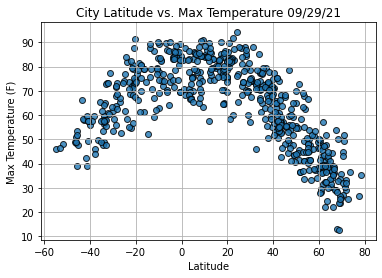

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

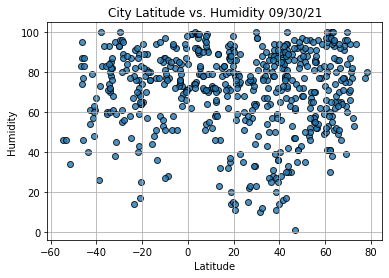

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

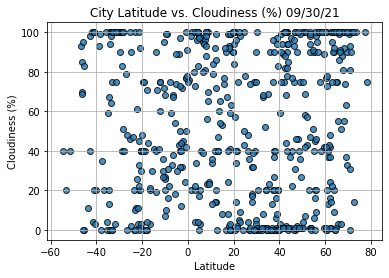

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

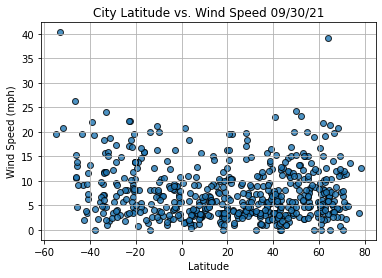

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13 

City              Plettenberg Bay
Country                        ZA
Date          2021-09-29 03:45:28
Lat                      -34.0527
Lng                       23.3716
Max Temp                    56.32
Humidity                       71
Cloudiness                    100
Wind Speed                   4.81
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nanortalik,GL,2021-09-29 03:47:18,60.1432,-45.2371,36.88,62,0,3.67
3,Kodiak,US,2021-09-29 03:47:19,57.7900,-152.4072,51.31,62,75,0.00
7,Umm Kaddadah,SD,2021-09-29 03:47:22,13.6017,26.6876,83.03,23,60,15.14
8,Tibana,RO,2021-09-29 03:47:22,46.9833,27.3333,48.38,61,100,1.61
10,Westport,US,2021-09-29 03:47:24,41.1415,-73.3579,65.98,87,1,5.99
...,...,...,...,...,...,...,...,...,...
560,Mackenzie,CA,2021-09-29 03:53:29,55.2999,-123.1698,44.82,70,40,6.91
561,Novyy Karachay,RU,2021-09-29 03:53:29,43.8208,41.9032,46.49,89,94,1.79
562,Pangnirtung,CA,2021-09-29 03:53:29,66.1451,-65.7125,35.31,51,100,2.64
563,Port Blair,IN,2021-09-29 03:53:30,11.6667,92.7500,84.06,72,92,3.04


In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nanortalik,GL,2021-09-29 03:47:18,60.1432,-45.2371,36.88,62,0,3.67
3,Kodiak,US,2021-09-29 03:47:19,57.7900,-152.4072,51.31,62,75,0.00
7,Umm Kaddadah,SD,2021-09-29 03:47:22,13.6017,26.6876,83.03,23,60,15.14
8,Tibana,RO,2021-09-29 03:47:22,46.9833,27.3333,48.38,61,100,1.61
10,Westport,US,2021-09-29 03:47:24,41.1415,-73.3579,65.98,87,1,5.99


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

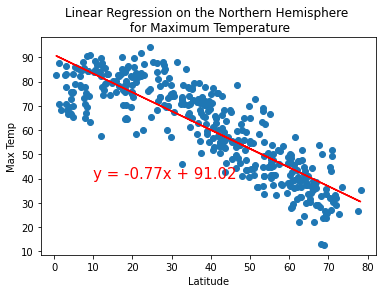

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

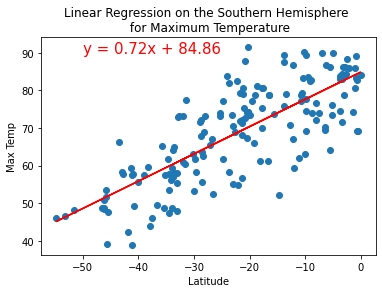

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

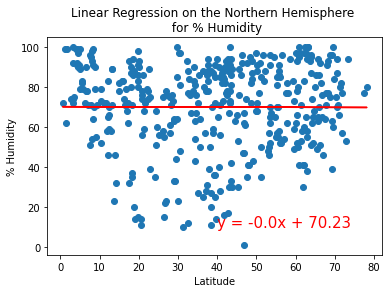

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

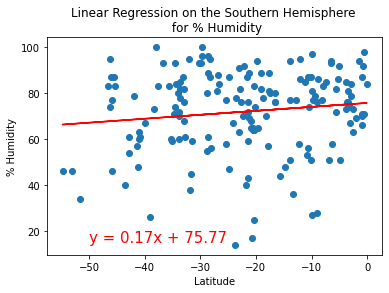

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

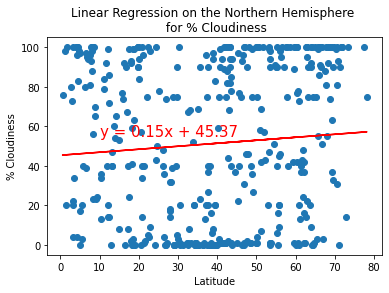

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

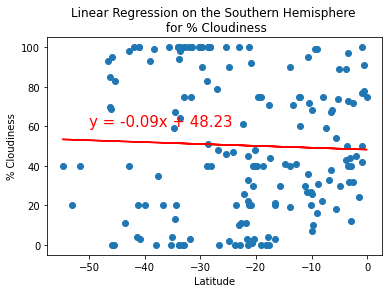

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

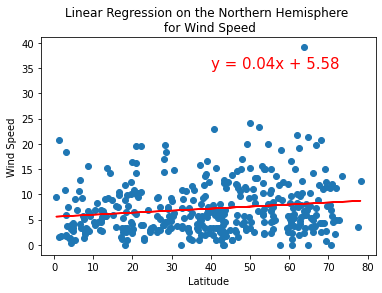

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

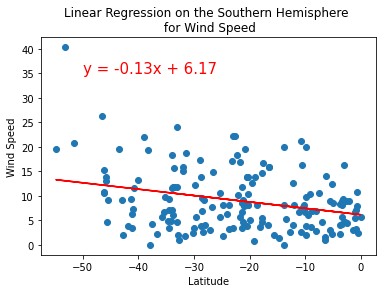

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))